corrProtoss: 0.8938233232788555
corrZerg: 0.8509175533607386
corrTerran: 0.9023140771998815
corr worker and win: 0.03290900166179505
corr army and win: 0.00040665951800632


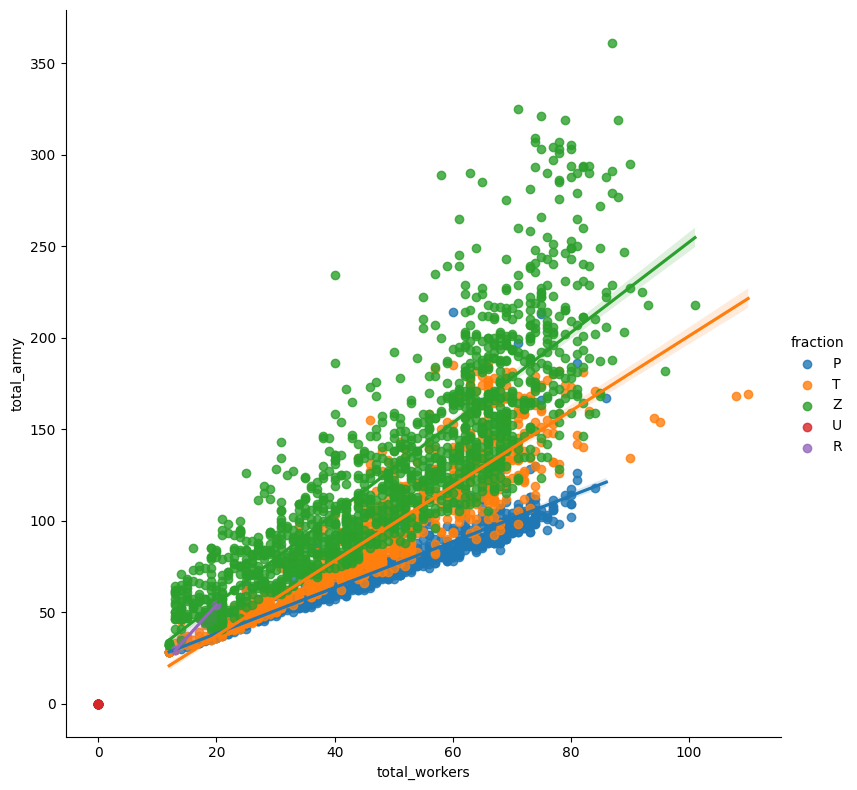

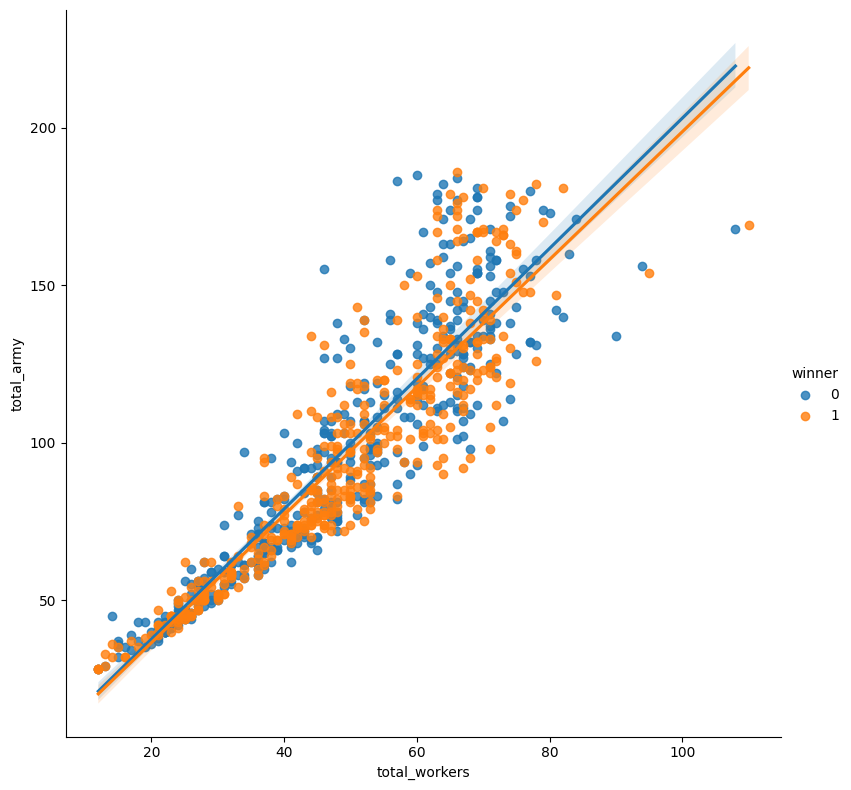

In [1]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army", hue="winner", data=dfTerran[["total_workers", "total_army", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


corrProtoss: 0.6256285513256388
corrZerg: 0.6808564884978998
corrTerran: 0.776848707824173
corr worker and win: 0.03290900166179505
corr army and win: -0.031389213486439825


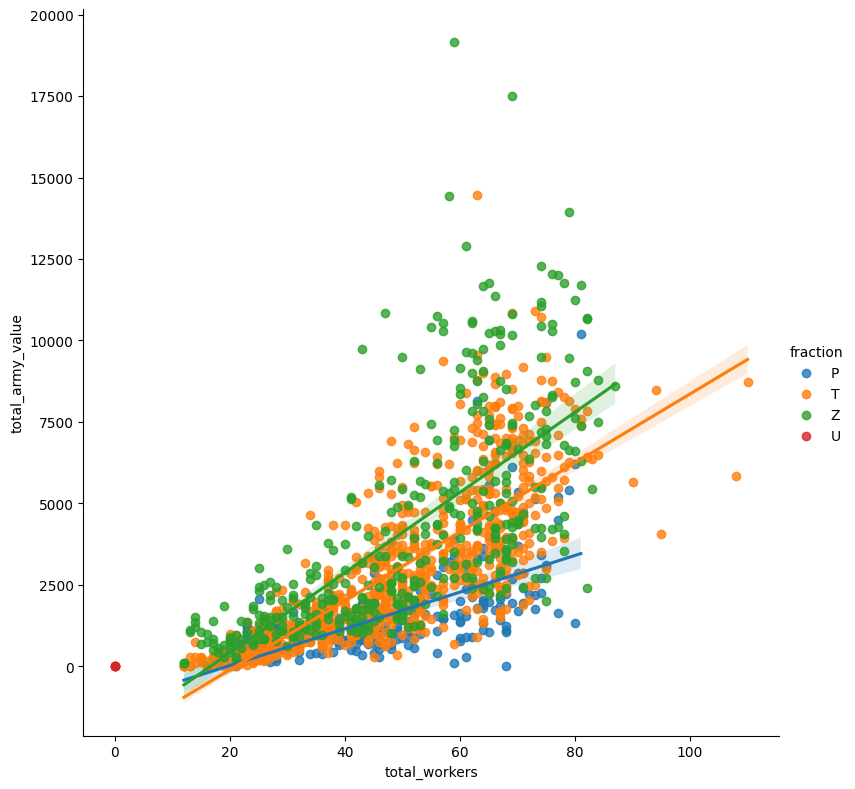

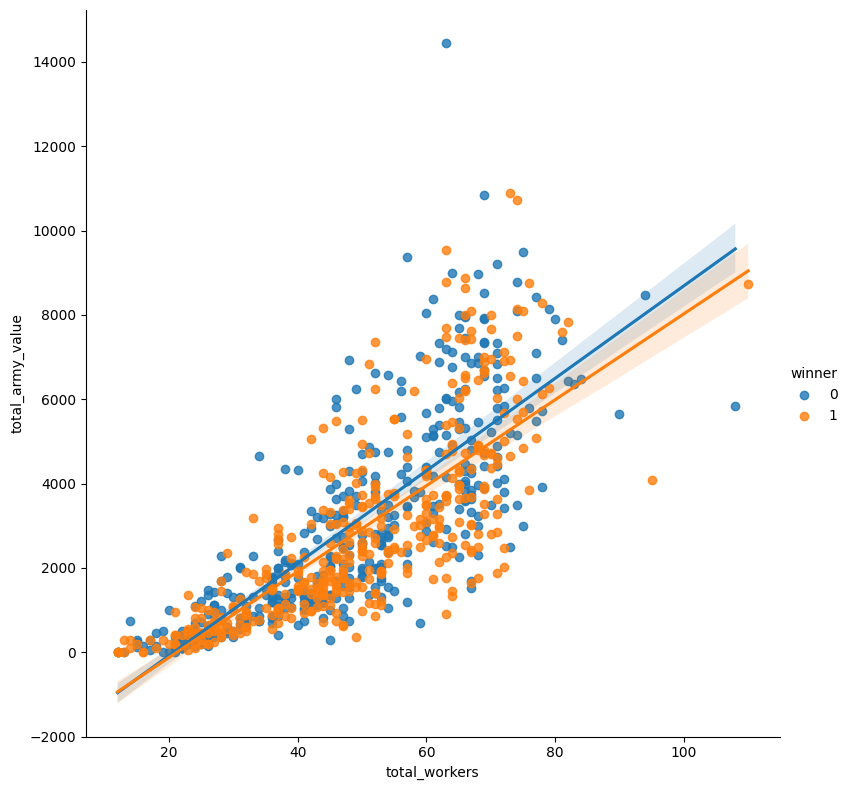

In [53]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/4thRun.csv')

df = pd.concat([df1, df2, df3, df4])

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

corrProtoss = dfProtoss["total_workers"].corr(dfProtoss["total_army_value"])
corrZerg = dfZerg["total_workers"].corr(dfZerg["total_army_value"])
corrTerran = dfTerran["total_workers"].corr(dfTerran["total_army_value"])

print("corrProtoss: {}\ncorrZerg: {}\ncorrTerran: {}".format(corrProtoss,corrZerg,corrTerran))

g3= sns.lmplot(x="total_workers", y="total_army_value", hue="winner", data=dfTerran[["total_workers", "total_army_value", "winner"]],
          height=heighti)

# Korrelation worker und sieg

corrWorker = dfTerran["total_workers"].corr(dfTerran["winner"])

# Korrelation army und sieg
# keine Korrelation, da nur die army zum ersten zeitpunkt zählt

corrArmy = dfTerran["total_army_value"].corr(dfTerran["winner"])

print("corr worker and win: {}\ncorr army and win: {}".format(corrWorker,corrArmy))


<Axes: >

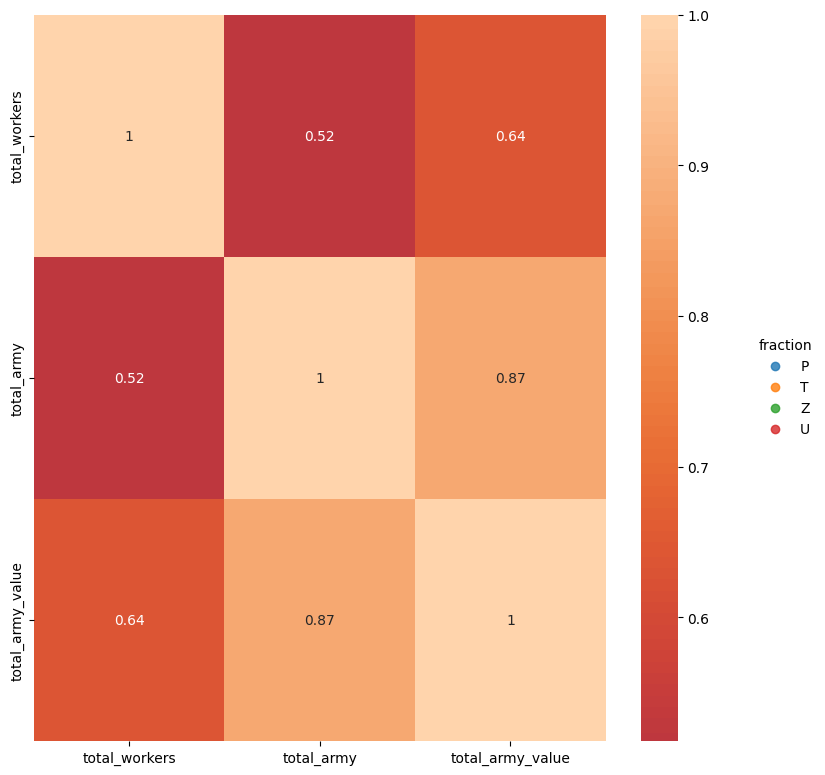

In [11]:
# Ermitteln welche Fraktion die stärkste Korrelation hat

import pandas as pd
import warnings

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np


df = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')

heighti = 8

g3= sns.lmplot(x="total_workers", y="total_army", hue="fraction", data=df[["total_workers", "total_army", "fraction", "total_army_value"]],
          height=heighti)


dfProtoss = df[df["fraction"] == "P"]
dfZerg = df[df["fraction"] == "Z"]
dfTerran = df[df["fraction"] == "T"]

sns.heatmap(df[["total_workers","total_army","total_army_value"]].corr(), annot=True, center=0)

In [19]:
# regression without scaling

import pandas as pd
import warnings

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer

"""
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('csv_dateien/starcraftFinalcsvs/4thRun.csv')

"""
df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
df = pd.concat([df1, df2])

dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")


The R^2 value in the test set is 0.5397953597337526


In [2]:
# optimizer with scaling

import pandas as pd
import warnings
import gurobipy as gp
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.compose import make_column_transformer
import gurobipy_pandas as gppd
from gurobi_ml import add_predictor_constr

df1 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/1stRun.csv')
df2 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/2ndRun.csv')
"""
df3 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
df4 = pd.read_csv('../csv_dateien/starcraftFinalcsvs/4thRun.csv')

"""
df = pd.concat([df1, df2])


dfTerran = df[df["fraction"] == "T"]

X = dfTerran[["total_workers", "total_army"]]
y = dfTerran["total_army_value"]

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=1
)

feat_transform = make_column_transformer(
    (StandardScaler(), ["total_workers", "total_army"]),
)

scaler = StandardScaler()
lin_reg = make_pipeline(scaler, LinearRegression())
lin_reg.fit(X_train, y_train)

y_pred = lin_reg.predict(X_test)
print(f"The R^2 value in the test set is {r2_score(y_test, y_pred)}")

data = pd.read_csv('../csv_dateien/starcraftFinalcsvs/3rdRun.csv')
dfTerranOpt = data[data["fraction"] == "T"]


# ,player,total_workers,total_army_value,total_army,fraction,winner,replay_filename
dfTerranOpt = dfTerranOpt.drop(columns=["total_workers","player", "replay_filename", "winner", "fraction", "Unnamed: 0"])

# create Model
m = gp.Model("Worker optimizer")

# create variables
av = gppd.add_vars(m,lb=-gp.GRB.INFINITY, pandas_obj=dfTerranOpt, name="total_army_value")
w = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_workers", vtype=gp.GRB.INTEGER)
a = gppd.add_vars(m,pandas_obj=dfTerranOpt, name="total_army", vtype=gp.GRB.INTEGER)
m.update()



dfTerranOpt = dfTerranOpt.drop(columns=["total_army_value"])
feats = dfTerranOpt
feats = pd.concat([w, feats], axis=1)


m.setObjectiveN(av.sum(),0, gp.GRB.MAXIMIZE)

gppd.add_constrs(m,w + a, gp.GRB.GREATER_EQUAL , 0)
gppd.add_constrs(m,w + a, gp.GRB.LESS_EQUAL , 200)
m.update()

pred_constr = add_predictor_constr(m, lin_reg, feats, av,output_type=gp.GRB.INTEGER)
pred_constr.print_stats()

# m.Params.NonConvex = 2


m.optimize()

m.write("out.mst")
m.write("out.sol")

print(
    "Maximum error in approximating the regression {:.6}".format(
        np.max(pred_constr.get_error())
    )
)

outputs = pd.concat([pred_constr.input_values, av], axis=1)



"""s#




dfTerranOpt = dfTerranOpt.loc[:, features]

m.update()

dfTerranOpt[:10]





"""


The R^2 value in the test set is 0.9143379471734923
Set parameter Username
Academic license - for non-commercial use only - expires 2024-04-17
Model for pipe1:
579 variables
579 constraints
Input has shape (193, 2)
Output has shape (193, 1)

Pipeline has 2 steps:

--------------------------------------------------------------------------------
Step            Output Shape    Variables              Constraints              
                                                Linear    Quadratic      General
std_scaler1         (193, 2)          579          386            0            0

lin_reg1            (193, 1)            0          193            0            0

--------------------------------------------------------------------------------
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a m

's#\n\n\n\n\ndfTerranOpt = dfTerranOpt.loc[:, features]\n\nm.update()\n\ndfTerranOpt[:10]\n\n\n\n\n\n'